# Import libraries

In [6]:
import mediapipe
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import shutil
import os
#from mpl_toolkits.mplot3d import Axes3D

In [7]:
#%matplotlib notebook

In [8]:
dim = (224, 224)
gamma = 0.4

In [9]:
def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [10]:
correct = 0
wrong = 0

for file in glob.glob("./data_heightmap/*.png"):
    print(file)
    image = cv2.imread(file)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    adjusted = adjust_gamma(resized, gamma=gamma)
    enhanced = cv2.detailEnhance(adjusted, sigma_s=25, sigma_r=0.15)
    img = enhanced.copy()
    mp_face_mesh = mediapipe.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)
    results = face_mesh.process(img)
    landmarks = results.multi_face_landmarks
    #landmarks = results.multi_face_landmarks[0]
    #length = len(landmarks.landmark)
    #length = len(results.multi_face_landmarks)
    
    if landmarks:
        correct += 1
    else:
        shutil.copy(file, "./issue_files/")
        os.remove(file)
        wrong += 1
        
print(correct)
print(wrong)

./data_heightmap_v2\1.png
./data_heightmap_v2\10.png
./data_heightmap_v2\100.png
./data_heightmap_v2\101.png
./data_heightmap_v2\102.png
./data_heightmap_v2\103.png
./data_heightmap_v2\104.png
./data_heightmap_v2\105.png
./data_heightmap_v2\106.png
./data_heightmap_v2\107.png
./data_heightmap_v2\108.png
./data_heightmap_v2\109.png
./data_heightmap_v2\11.png
./data_heightmap_v2\110.png
./data_heightmap_v2\111.png
./data_heightmap_v2\112.png
./data_heightmap_v2\113.png
./data_heightmap_v2\114.png
./data_heightmap_v2\115.png
./data_heightmap_v2\116.png
./data_heightmap_v2\117.png
./data_heightmap_v2\118.png
./data_heightmap_v2\119.png
./data_heightmap_v2\12.png
./data_heightmap_v2\120.png
./data_heightmap_v2\121.png
./data_heightmap_v2\122.png
./data_heightmap_v2\123.png
./data_heightmap_v2\124.png
./data_heightmap_v2\125.png
./data_heightmap_v2\126.png
./data_heightmap_v2\127.png
./data_heightmap_v2\128.png
./data_heightmap_v2\129.png
./data_heightmap_v2\13.png
./data_heightmap_v2\130.pn

# Apply model

In [ ]:
### LANDMARK DETECTION ###

In [220]:
img = adjusted.copy()

In [221]:
mp_face_mesh = mediapipe.solutions.face_mesh

In [222]:
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

In [223]:
results = face_mesh.process(img)

In [224]:
landmarks = results.multi_face_landmarks[0]

In [225]:
# print(landmarks.landmark[0])
print(len(landmarks.landmark))

478


In [226]:
#xs = []; ys = []; zs = []

for landmark in landmarks.landmark:
    x = landmark.x
    y = landmark.y
    #z = landmark.z
    
#     xs.append(x)
#     ys.append(y)
#     zs.append(z)
    
    relative_x = int(x * img.shape[1])
    relative_y = int(y * img.shape[0]) # To denormalize values
    
    cv2.circle(img, (relative_x, relative_y), radius=5, color=(0, 0, 255), thickness=-1)

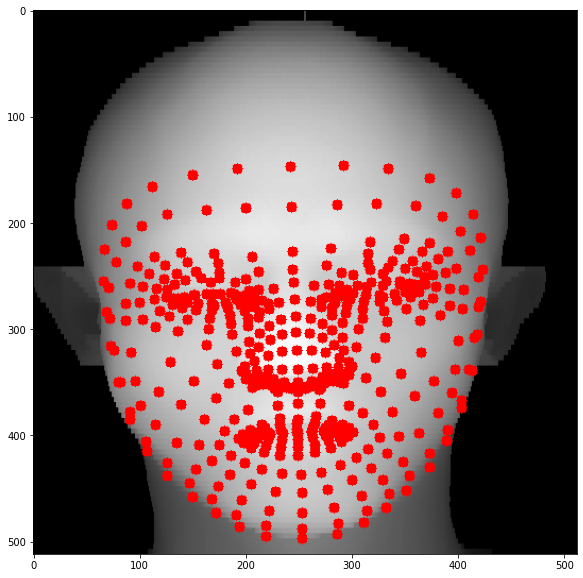

In [227]:
plt.figure(figsize = (10,10))
plt.imshow(img[:,:,::-1]) # Reversing to change it to RGB from BGR

In [228]:
# fig = plt.figure()
# ax = Axes3D(fig)

# projection = ax.scatter(xs, ys, zs, color='green')

# plt.show()

In [229]:
#mp_face_mesh.FACEMESH_LEFT_EYE

In [ ]:
### CONTOUR DETECTION ###

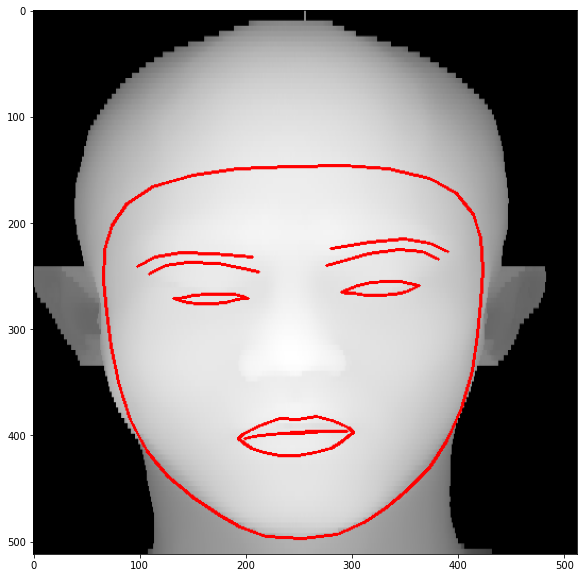

In [234]:
img = resized.copy()

for source_idx, target_idx in mp_face_mesh.FACEMESH_CONTOURS:
    
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
    
    relative_source = (int(source.x * img.shape[1]), int(source.y * img.shape[0]))
    relative_target = (int(target.x * img.shape[1]), int(target.y * img.shape[0]))
    
    cv2.line(img, relative_source, relative_target, color=(0, 0, 255), thickness=2)
    
plt.figure(figsize = (10,10))
plt.imshow(img[:,:,::-1]) # Reversing to change it to RGB from BGR

In [ ]:
### FACE MESH DETECTION ###

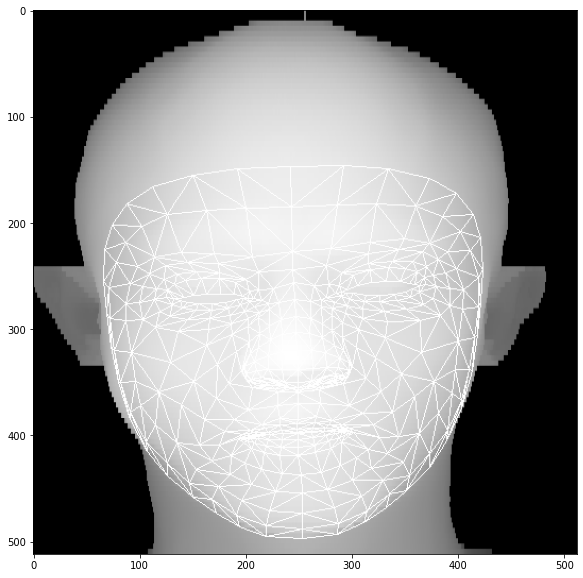

In [233]:
img = resized.copy()

for source_idx, target_idx in mp_face_mesh.FACEMESH_TESSELATION:
    
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
    
    relative_source = (int(source.x * img.shape[1]), int(source.y * img.shape[0]))
    relative_target = (int(target.x * img.shape[1]), int(target.y * img.shape[0]))
    
    cv2.line(img, relative_source, relative_target, color=(255, 255, 255), thickness=1)
    
plt.figure(figsize = (10,10))
plt.imshow(img[:,:,::-1]) # Reversing to change it to RGB from BGR